# Predicting the Sale Price of a Bulldozer using Time-Series Data

**In this mini Data Science project, I sought to develop a model that can predict the price of a Bulldozer today using historical data.**  

**This is essentially my attempt at the "Bluebook for Bulldozers Kaggle Competition" that was completed in late 2012.**

## 1. Problem Definition
> How well can my model predict the future sale price of a bulldozer, given certain characteristics, using histrical data indicating how much similar bulldozers sold for.

## 2. Data
The data is downloaded from the "Kaggle Bluebook for Bulldozers Competition"

Link to the kaggle page : https://www.kaggle.com/c/bluebook-for-bulldozers/data   

The data for this competition is split into three parts:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012.   

The key fields are in train.csv are:

* SalesID: the uniue identifier of the sale
* MachineID: the unique identifier of a machine.  A machine can be sold multiple times
* saleprice: what the machine sold for at auction (only provided in train.csv)
* saledate: the date of the sale  

The machine_appendix.csv file contains the correct year manufactured for a given machine along with the make, model, and product class details. There is one machine id for every machine in all the competition datasets (training, evaluation, etc.).  

**Refer to the data dictionary for more detialed descriptions of each feature in the aforementioned datasets.**

## 3. Evaluation

The evaluation metric for this competition was the **RMSLE** (Root Mean Squared Log Error) between the actual and the predicted auction sale prices. This is the evaluation metric that I will also be using for this project.

### Goal
- **Minimise the RMSLE**


## 4. Features

**Refer to the data dictionary for more detialed descriptions of each feature in the aforementioned datasets.**

**Link to the Data Dicitonary here** -> https://drive.google.com/file/d/137C96v4USPF__97pBNIJ1AaKBkJsOJuB/view?usp=sharing



## 5. Initial Data Exploration & Analysis

In [16]:
# Package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [18]:
# Data import
# Training and Validation Sets
tnv_data = pd.read_csv("data/TrainAndValid.csv", low_memory = False)

In [3]:
tnv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
tnv_data.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
tnv_data.describe

<bound method NDFrame.describe of         SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  \
0       1139246    66000.0     999089     3157         121           3.0   
1       1139248    57000.0     117657       77         121           3.0   
2       1139249    10000.0     434808     7009         121           3.0   
3       1139251    38500.0    1026470      332         121           3.0   
4       1139253    11000.0    1057373    17311         121           3.0   
...         ...        ...        ...      ...         ...           ...   
412693  6333344    10000.0    1919201    21435         149           2.0   
412694  6333345    10500.0    1882122    21436         149           2.0   
412695  6333347    12500.0    1944213    21435         149           2.0   
412696  6333348    10000.0    1794518    21435         149           2.0   
412697  6333349    13000.0    1944743    21436         149           2.0   

        YearMade  MachineHoursCurrentMeter UsageBand 

In [8]:
# Checking for missing values
tnv_data.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

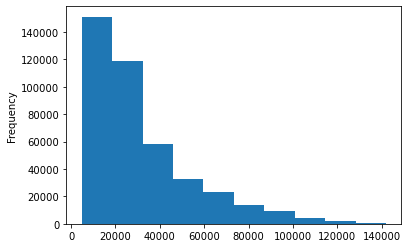

In [20]:
# Distribution Visualization of Sales Price
tnv_data.SalePrice.plot.hist();

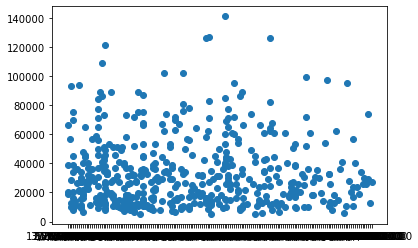

In [6]:
# Visualizing the relationship between saledate and SalePrice
fig, ax = plt.subplots()
ax.scatter(tnv_data.saledate[:500], tnv_data.SalePrice[:500]);

In [24]:
tnv_data.saledate[:100]

0     11/16/2006 0:00
1      3/26/2004 0:00
2      2/26/2004 0:00
3      5/19/2011 0:00
4      7/23/2009 0:00
           ...       
95    12/15/2005 0:00
96     1/29/2004 0:00
97     9/18/2008 0:00
98     11/3/2005 0:00
99      6/1/2006 0:00
Name: saledate, Length: 100, dtype: object

### Parsing the Dates

Since the dates are of type `object` , we need to parse the dates so that we can encode the dates as `datetime` objects in order to use them for the data analysis and training.  

We can do this by passing the `parse_dates` paramerter when importing the data.

In [21]:
# Import data again but this time parse dates
tnv = pd.read_csv("data/TrainAndValid.csv", low_memory = False, parse_dates=["saledate"])

In [22]:
tnv.saledate.dtype

dtype('<M8[ns]')

In [23]:
tnv.saledate[:100]

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
        ...    
95   2005-12-15
96   2004-01-29
97   2008-09-18
98   2005-11-03
99   2006-06-01
Name: saledate, Length: 100, dtype: datetime64[ns]

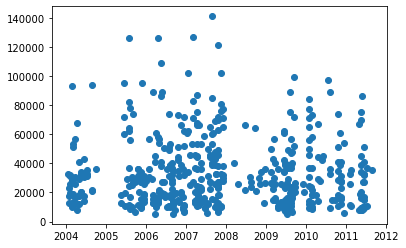

In [25]:
# Now I re-visualise the Saleprice and sale dates
fig, ax = plt.subplots()
ax.scatter(tnv.saledate[:500], tnv.SalePrice[:500]);

In [26]:
tnv.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
tnv.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [30]:
tnv.saledate.head()

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

### Sorting the dataframe by saledate
When working with time series data, it's a good idea to sort it by date.

In [32]:
tnv.sort_values(by=['saledate'], inplace=True, ascending=True)
tnv.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [33]:
tnv.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


In [34]:
# Making a copy of the original dataframe
tnv_copy = tnv.copy()

In [35]:
tnv_copy.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


## Feature Engineering 
### Creating a `saleyear` , `salemonth` and `saleday` column by adding datetime parameters for `saledate` column

In [38]:
tnv_copy["saleYear"] = tnv_copy.saledate.dt.year
tnv_copy["saleMonth"] = tnv_copy.saledate.dt.month
tnv_copy["saleDay"] = tnv_copy.saledate.dt.day
tnv_copy["saleDayOfWeek"] = tnv_copy.saledate.dt.dayofweek
tnv_copy["saleDayOfYear"] = tnv_copy.saledate.dt.dayofyear

In [39]:
tnv_copy.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [40]:
#Dropping the saledate column
tnv_copy.drop("saledate", axis=1, inplace=True)

In [41]:
#Evaluating the state column 
tnv_copy.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

## 6. Data Pre-Processing

In [42]:
# Checking feature data types
tnv_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

### 6.1 Dealing with categorical data
Majority of the features are of type `object` and more specifically `string` data which we cannot pass through any model for fitting/training.  
We require this data to be in a meaningful numerical form for modelling.  

**But before we convert them to numerical values, we need to first convert them from object (strings) into encoded categorical data that we can now pass through the model.**

### Checking if an object data type is compatible with pandas/sklearn
### using pandas `utility functions`.
https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html

In [43]:
# Checking if the `UsageBand` column of type string is a compatible pandas dtype
pd.api.types.is_string_dtype(tnv_copy.UsageBand)

True

In [47]:
# Find the columns which contain strings
for label, content in tnv_copy.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


### Converting all columns of type `Object (String)` into pandas `category` values

In [50]:
for label, content in tnv_copy.items():
    if pd.api.types.is_string_dtype(content):
        tnv_copy[label] = content.astype("category").cat.as_ordered()

In [51]:
tnv_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [52]:
# Viewing the state categorical data
tnv_copy.state.head()

205615      Texas
274835    Florida
141296    Florida
212552    Florida
62755     Florida
Name: state, dtype: category
Categories (53, object): ['Alabama' < 'Alaska' < 'Arizona' < 'Arkansas' ... 'Washington DC' < 'West Virginia' < 'Wisconsin' < 'Wyoming']

In [54]:
# Viewing the categorical state data's numerical encodings
tnv_copy.state.cat.codes.head()

(205615    43
 274835     8
 141296     8
 212552     8
 62755      8
 dtype: int8,
 205615      Texas
 274835    Florida
 141296    Florida
 212552    Florida
 62755     Florida
 Name: state, dtype: category
 Categories (53, object): ['Alabama' < 'Alaska' < 'Arizona' < 'Arkansas' ... 'Washington DC' < 'West Virginia' < 'Wisconsin' < 'Wyoming'])

#### ACCESSING THE CATEGORICAL DATA USING THE NUMERICAL ENCODINGS THAT PANDAS ASSIGNS

In [55]:
# Checking missing values
tnv_copy.isna().sum()/len(tnv_copy)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Save the Preprocessed DataFrame into a CSV so we can pick up where we left off tomorrow...

In [56]:
# Export tnv_copy
tnv_copy.to_csv("data/tnv_copy.csv", index=False)

### 6.2 Filling Missing Values

In [57]:
tnv_copy.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [60]:
# Checking which numeric columns have null values
for label, content in tnv_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [61]:
# Fill empty numeric field rows with the median
# Median is more robust than the mean as fill value for data with large variance
for label, content in tnv_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tell us if the data is missing or not
            tnv_copy[label+"_is_missing"] = pd.isnull(content)
            #Fill missing numeric values with median
            tnv_copy[label] = content.fillna(content.median())

In [62]:
# Demonstrate how median is more robust than the mean
hundreds = np.full((1000,), 100)
hundred_billions =  np.append(hundreds, 1000000000)
np.mean(hundreds), np.mean(hundred_billions), np.median(hundreds), np.median(hundred_billions)

(100.0, 999100.8991008991, 100.0, 100.0)

**^^ We can see that the median is more robust to outliers**

In [63]:
tnv_copy.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

In [64]:
# Check out to see how many examples were missing that we just filled in the auctioneerID column
tnv_copy.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

### 6.3 Filling and Converting Categorical Features into Numbers

In [65]:
# Check for columns which are not numeric
# Checking which numeric columns have null values
for label, content in tnv_copy.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [66]:
# Converting state category into numbers
pd.Categorical(tnv_copy.state).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [67]:
# Converting the categorical data into numbers and filling missing entries
for label, content in tnv_copy.items():
    if not pd.api.types.is_numeric_dtype(content):
        #Add binary column to indicate whether sample had missing values or not
        tnv_copy[label+"is_missing"] = pd.isnull(content)
        # Turn categories into numbers and adding 1 to ensure the missing values get a binary value of one instead of -1
        tnv_copy[label] = pd.Categorical(content).codes+1

In [68]:
tnv_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controlsis_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 81.1 MB


In [69]:
tnv_copy.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mountingis_missing,False,True,False,True,False
Blade_Typeis_missing,False,True,False,True,False
Travel_Controlsis_missing,False,True,False,True,False
Differential_Typeis_missing,True,False,True,False,True


In [74]:
tnv_copy.isna().sum()

SalesID                        0
SalePrice                      0
MachineID                      0
ModelID                        0
datasource                     0
                              ..
Backhoe_Mountingis_missing     0
Blade_Typeis_missing           0
Travel_Controlsis_missing      0
Differential_Typeis_missing    0
Steering_Controlsis_missing    0
Length: 103, dtype: int64

### Since there are no longer any missing and object type columns , we can begin the modelling processes.

## 7. Modelling

 ### Choosing the right estimator
Scitkit learn points us to :
* Random forest regressor
* Ridge Regressor


### Splitting the data into Training and Validation set
Training set - all data of which the saleyear < 2012  

Validation set - all data of which the saleyear = 2012

In [75]:
# Splitting the data
train_data = tnv_copy[tnv_copy.saleYear != 2012]
validation_data = tnv_copy[tnv_copy.saleYear == 2012]

len(train_data), len(validation_data)

(401125, 11573)

In [76]:
#Creating X and y training and validation data sets
X_train, y_train = train_data.drop("SalePrice", axis=1), train_data.SalePrice
X_valid, y_valid = validation_data.drop("SalePrice", axis=1), validation_data.SalePrice

In [78]:
y_train

205615     9500.0
274835    14000.0
141296    50000.0
212552    16000.0
62755     22000.0
           ...   
393098    29000.0
400217    11000.0
400302    11000.0
400393    18000.0
393123    13500.0
Name: SalePrice, Length: 401125, dtype: float64

## 7.1 . Evaluation
**The evaluaiton metric for this project is the RMSLE**

### 7.1.1 Building the Custom RMSLE Error Metric
To do this , I built upon the the sklearn `MSLE` evaluation metric.

In [86]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculates the RMSLE between predictions and ground truth labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create a function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds)
             }
    return scores

## 7.2 Random Forest Regressor

When dealing with large datasets, fitting the model on the data can take quite alot of time.  
To reduce the training time and therefore reducing the time between experiments. 

**To do this we train the model on a subset of the training data.**  

**For the random forest regressor, we can either reduce the number of `n_estimators` but most importantly the `max_samples` which limits the amount of training examples fitted to the model.**

In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Random seed
np.random.seed(42)

#Instantiating the model and setting max_samples to 10,000
rf_reg = RandomForestRegressor(n_jobs=-1, random_state = 42, max_samples = 10000)

In [83]:
%%time
rf_reg.fit(X_train, y_train)

CPU times: user 45.9 s, sys: 1.8 s, total: 47.7 s
Wall time: 18.8 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [87]:
# Evaluate the model
show_scores(rf_reg)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

### 7.2.1 Hyperparameter Tuning using RandomisedSearchCV

In [90]:
%%time
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators": np.arange(10, 100, 10),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf" : np.arange(1, 20, 2),
          "max_features": [0.5, 1, "sqrt", "auto"],
          "max_samples": [10000]}

# Instantiate RSCV model
rs_rfreg = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                   random_state = 42),
                                                   param_distributions = rf_grid,
                                                   n_iter = 2,
                                                   cv=5,
                                                   verbose=True)
# Fir the RSCV model
rs_rfreg.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: user 32.7 s, sys: 6.52 s, total: 39.2 s
Wall time: 1min 20s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [91]:
# Finding the best RSCV model hyperparams
rs_rfreg.best_params_

{'n_estimators': 60,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 1,
 'max_depth': None}

In [92]:
# Evaluate the RSCV Regression model
show_scores(rs_rfreg)

{'Training MAE': 8891.655193695899,
 'Valid MAE': 11313.549827603978,
 'Training RMSLE': 0.39237058829152377,
 'Valid RMSLE': 0.4484052255971633,
 'Training R^2': 0.6825547447927643,
 'Valid R^2': 0.6361784117343763}

#### ^^ The RSCV RandomForestRegression model displayed a worse RMSLE score than the base/vanilla RandomForestRegressor .

**NB -> Use more n_iters inorder to search a wider range of models**

### The best RandomizedSearchCV hyperparameters using n_iter = 100 
**Note : Do this yourself on Google Colab**

In [93]:
%%time

# Most ideal hyperparameters
# Training on all the training data
ideal_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf = 1,
                                   min_samples_split = 14,
                                   max_features = 0.5,
                                   n_jobs = -1,
                                   max_samples = None,
                                   random_state = 42)

# Fitting the model
ideal_model.fit(X_train, y_train)

CPU times: user 4min 27s, sys: 3.59 s, total: 4min 31s
Wall time: 1min 32s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [94]:
# Evaluating the ideal model 
show_scores(ideal_model)

{'Training MAE': 2953.816113716348,
 'Valid MAE': 5951.247761444453,
 'Training RMSLE': 0.14469006962371858,
 'Valid RMSLE': 0.24524163989538328,
 'Training R^2': 0.9588145522577225,
 'Valid R^2': 0.8818019502450094}

### The Ideal Model has a RMSLE of 0.245 while the vanilla RandomForestRegressor has an RMSLE of 0.294


## 7.3 Making Predictions on Test Data

In [102]:
# Importing the test dataset
test_data = pd.read_csv("data/Test.csv", low_memory = False, parse_dates=["saledate"])
test_data.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


### 7.3.1 PreProcessing the Test dataset
**In order to get the test data set into the same format as the train and validation data sets.**

In [103]:
def preprocess_data(dataframe):
    """
    Converting the testing set into the same format as the train/valid set.
    """
    # Feature creation from the `saledate` column
    dataframe["saleYear"] = dataframe.saledate.dt.year
    dataframe["saleMonth"] = dataframe.saledate.dt.month
    dataframe["saleDay"] = dataframe.saledate.dt.day
    dataframe["saleDayOfWeek"] = dataframe.saledate.dt.dayofweek
    dataframe["saleDayOfYear"] = dataframe.saledate.dt.dayofyear
    
    dataframe.drop("saledate", axis=1, inplace=True)
    
    # Fill the numeric columns with the median value
    for label, content in dataframe.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tell us if the data is missing or not
                dataframe[label+"_is_missing"] = pd.isnull(content)
                #Fill missing numeric values with median
                dataframe[label] = content.fillna(content.median())
            
        # Fill categorical columns and then transform them into numerical format
        if not pd.api.types.is_numeric_dtype(content):
            dataframe[label+"is_missing"] = pd.isnull(content)
            dataframe[label] = pd.Categorical(content).codes+1
            
    return dataframe

In [104]:
# Preprocesssing the test data using the developed fucntion pipeline
test_data1 = preprocess_data(test_data)
test_data1.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Widthis_missing,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


### The preprocessed test data has one less column than the trainandvalid dataset
**In order to fix this we can identify which column is missing using some handy functionality.**

In [105]:
# We can find how the columns between the two datasets differ
set(X_train.columns) - set(test_data1.columns)

{'auctioneerID_is_missing'}

In [106]:
# Manually adjust the test_data1 to have the auctioneerID_is_missing column
test_data1["auctioneerID_is_missing"] = False
test_data1.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


### Now our test_data set matches the training dataset we can now make predicitons

In [107]:
# Making predictions
test_preds = ideal_model.predict(test_data1)

In [108]:
len(test_preds)

12457

### Formatting predictions into the format that Kaggle is asking for.
https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

In [109]:
preds = pd.DataFrame()
preds["SalesID"] = test_data1["SalesID"]
preds['SalesPrice'] = test_preds
preds

,SalesID,SalesPrice
0,1227829,20614.367809
1,1227844,19897.801707
2,1227847,44852.219594
3,1227848,68346.325323
4,1227863,39487.349708
...,...,...
12452,6643171,46466.092910
12453,6643173,17500.493352
12454,6643184,14296.986205
12455,6643186,22164.857577


In [110]:
# Export the predicitons into a csv
preds.to_csv("data/submission_predictions.csv", index=False)

## 8.Feature Importance
Feature importance seeks to establish which features had the most significant effect on the **target** feature that is to be predicted ->`SalesPrice`.

In [111]:
#Finding the feature importance of our best model
ideal_model.feature_importances_

array([3.39445533e-02, 1.81148281e-02, 4.09167072e-02, 1.70752171e-03,
       3.40797459e-03, 2.08200698e-01, 2.95067052e-03, 1.10113725e-03,
       4.16122668e-02, 4.71911805e-02, 6.23815431e-02, 4.67433955e-03,
       1.52524442e-02, 1.52517337e-01, 4.72224713e-02, 5.96817956e-03,
       1.29351899e-03, 2.78088439e-03, 2.37248769e-03, 6.17114453e-02,
       8.13525488e-04, 3.61873268e-05, 9.19098115e-04, 2.23170993e-04,
       1.28102678e-03, 2.06519636e-05, 2.01477316e-03, 6.63364759e-03,
       2.15274492e-03, 2.50178165e-03, 4.63902393e-03, 3.85873985e-03,
       2.76062667e-03, 1.00782454e-03, 2.47969268e-04, 6.04239818e-03,
       7.64997072e-04, 1.57100537e-02, 2.29716203e-03, 2.58372272e-03,
       8.07637426e-04, 9.18548690e-04, 1.35656446e-03, 5.81458569e-04,
       4.96716928e-04, 3.79552257e-04, 5.31712788e-04, 2.71823509e-03,
       8.34294376e-04, 3.12136841e-04, 2.14075157e-04, 7.42422919e-02,
       3.80158492e-03, 5.67641024e-03, 2.87154703e-03, 9.83349904e-03,
      

In [118]:
# Visualising the feature importance
def plot_features(columns, importances , n=20):
    df = (pd.DataFrame({"features":columns,
                       "feature_importances": importances})
         .sort_values("feature_importances", ascending=False)
         .reset_index(drop=True))
    
    #Plottig the features
    fig, ax =plt.subplots(figsize=(15,15))
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

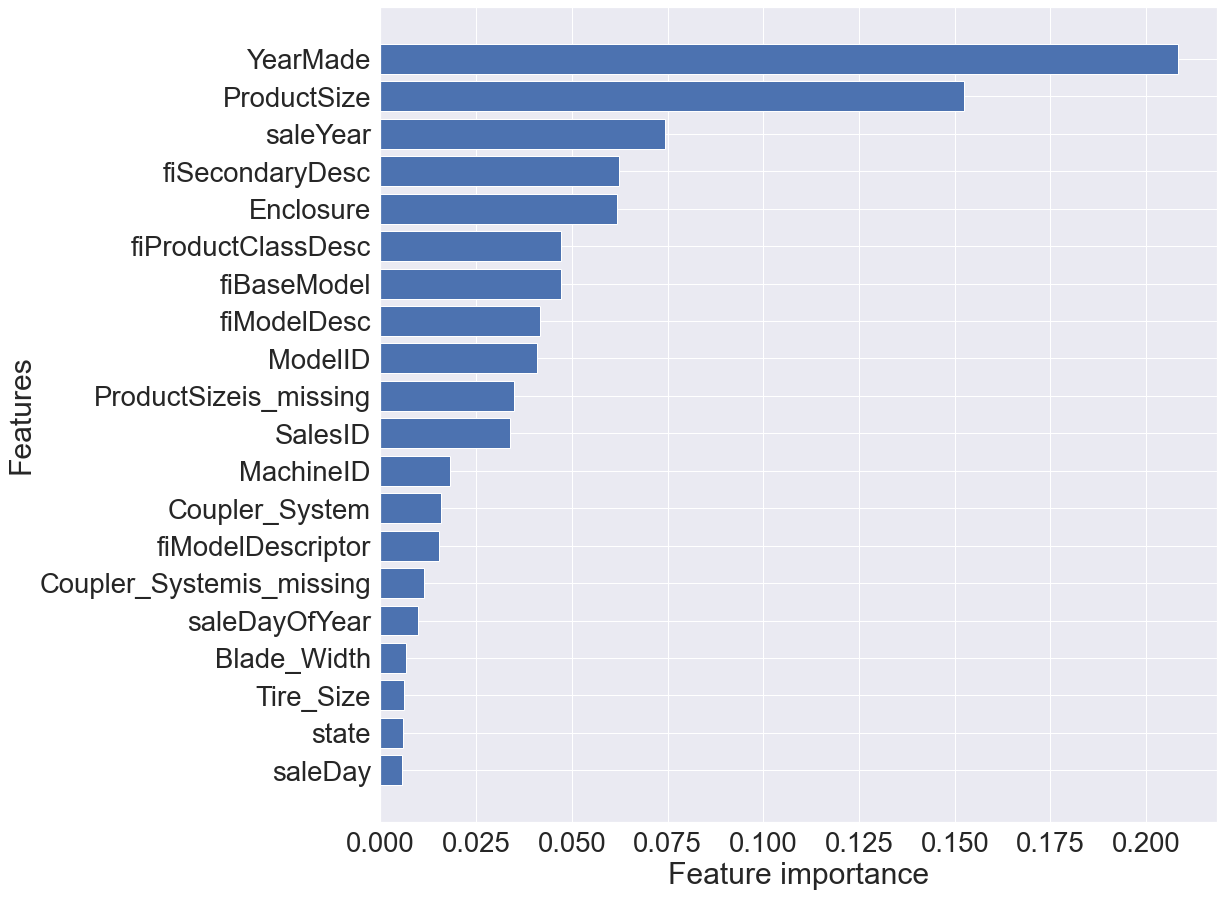

In [126]:
import seaborn as sns
sns.set(font_scale = 2.5)
plot_features(X_train.columns, ideal_model.feature_importances_)